# MPSlib: estimation

Johansson and Hansen (2021) demonstrate how to perform MPS estimation to directly obtain conditional statistics wiythout th eneed for simulation. 

    O.par['do_estimation'] # [0]: Simulation , [1] estimation
    
    
See details about MPS estimation in [Jóhannsson, Óli D., and Thomas Mejer Hansen. "Estimation using multiple-point statistics." Computers & Geosciences 156 (2021)](https://doi.org/10.1016/j.cageo.2021.104894).

In [1]:
# import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import mpslib as mps


In [2]:
O=mps.mpslib(method='mps_genesim',n_max_cpdf_count= 100, simulation_grid_size=np.array([28, 43, 1]));
#O=mps.mpslib(method='mps_snesim_tree', n_multiple_grids=1, simulation_grid_size=np.array([28, 43, 1]));
O.par['verbose_level']=1, 


## Set hard data
d_hard = np.array([[ 3, 3, 0, 1],
                    [ 8, 8, 0, 0],
                    [ 12, 3, 0, 1]])


## Set soft data
d_soft = np.array([[ 20, 6, 0, 0.3, 0.7],
                   [ 20, 20, 0, 0.001, 0.999]
                  ])


O.d_hard = d_hard
O.d_soft= d_soft

# Only co-locational
O.par['n_cond_soft']=2


# Set training image
O.ti = mps.trainingimages.strebelle(di=3, coarse3d=1)[0]

Using mps_genesim installed in /mnt/d/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/d/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


## Estimation

loading entropy from ti.dat_ent_0.gslib
loading entropy from ti.dat_cg_0.gslib
loading entropy from ti.dat_cg_1.gslib
Time used to perform MPS estimation: 12.9s


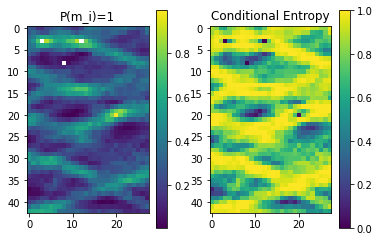

In [3]:
O.par['n_cond']=3; # For estimation, the numbner of conditionals need never be highed than the number of actual conditional hard and/or soft data.
O.par['n_real']=1;
O.par['do_estimation']=1
O.par['do_entropy']=1
# when using mps_genesim, we need to compute a conditional
O.par['n_max_cpdf_count']=1000000; # We need to be able to compute the conditional 
O.par['n_max_ite']=1000000
O.delete_local_files() # to make sure no old data are floating around
O.remove_gslib_after_simulation=1

O.run()
print('Time used to perform MPS estimation: %4.1fs' % (O.time))

# Get P(m_i==1)
P1=O.est[1][:,:,0].T
# Get H(m_i
H=O.Hcond[:,:,0].transpose()

plt.figure()
plt.subplot(121)
plt.imshow(P1)
plt.colorbar()
plt.title('P(m_i)=1')
plt.subplot(122)
plt.imshow(H)
plt.colorbar()
plt.title('Conditional Entropy')

plt.show()



## Simulation

parallel: Using 50 of max 52 threads
Time used to perform MPS simulation: 7.2s


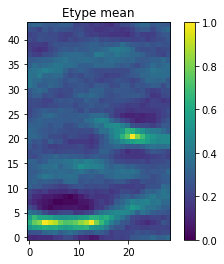

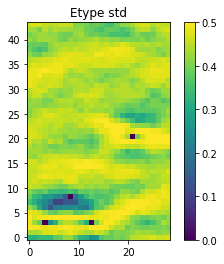

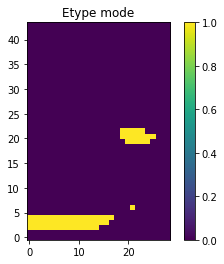

In [4]:
O.par['n_real']=30;
O.par['n_cond']=25; # For estimation, one typically needs n_cond higher to obtain realizations with resonable pattern reproduction.

O.par['do_estimation']=0
O.par['max_cpdf_count']=1; # Direct sampling mode
O.par['n_max_ite']=1000 # This is typically not set to a very high number to avoid scanning the whole TI

O.par['n_real']=100
O.delete_local_files() # to make sure no old data are floating around
O.remove_gslib_after_simulation=1

O.run_parallel()
print('Time used to perform MPS simulation:%4.1fs' % (O.time))
O.plot_etype()